In [1]:
import numpy as np
from matplotlib import pyplot as plt

import qcodes as qc
qc.data.data_set.DataSet.default_io.base_location = 'E:\EWJN\data'
loc_provider = qc.data.location.FormatLocation(fmt='data/{date}/#{counter}_{name}_{time}')
qc.data.data_set.DataSet.location_provider=loc_provider
%matplotlib notebook

<IPython.core.display.Javascript object>

# Measurement set 2

<IPython.core.display.Javascript object>


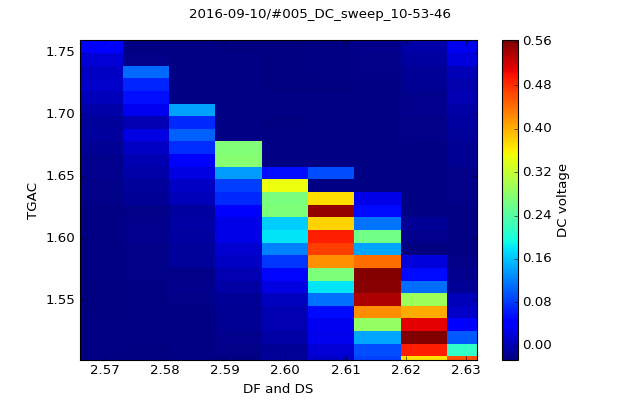

In [2]:
data = qc.load_data('2016-09-10/#005_DC_sweep_10-53-46')
plotQ = qc.MatPlot(data.DC_voltage)

ELRLR measurements showed no good spot. I decided to do another DC sweep around the donor+coulomb peak

<IPython.core.display.Javascript object>


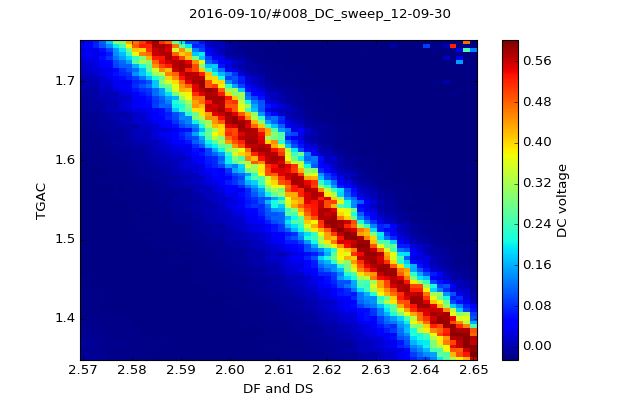

In [3]:
data = qc.load_data('2016-09-10/#008_DC_sweep_12-09-30')
plotQ = qc.MatPlot(data.DC_voltage)

It seems that the donor has shifted. 
This probably means that the system was not properly equilibrated after the magnetic field change.
Another DC sweep is done a bit more to the upper left

<IPython.core.display.Javascript object>


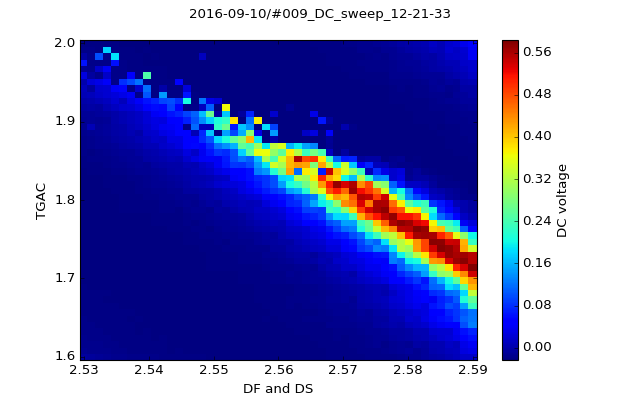

In [4]:
data = qc.load_data('2016-09-10/#009_DC_sweep_12-21-33')
plotQ = qc.MatPlot(data.DC_voltage)

One more scan of nearly the same region, after a few minutes

<IPython.core.display.Javascript object>


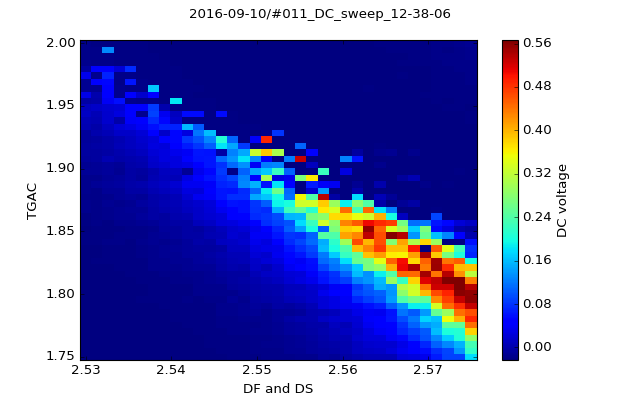

In [5]:
data = qc.load_data('2016-09-10/#011_DC_sweep_12-38-06')
plotQ = qc.MatPlot(data.DC_voltage)

In [8]:
data.contrast

DataArray[10,10]: contrast
array([[-0.0681818,  0.0487265, -0.0222222,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.237442 ],
       [ 0.118421 ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.196155 ,  0.408602 ],
       [ 0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.0353535,  0.271828 ,  0.414894 ,  0.41617  ],
       [ 0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.316735 ,  0.451613 ,  0.538387 ,  0.271269 ],
       [ 0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.425532 ,  0.495376 ,  0.412371 ,  0.231935 ,  0.       ],
       [ 0.       ,  0.       ,  0.       ,  0.18958  ,  0.306842 ,
         0.326531 ,  0.282828 ,  0.231443 ,  0.       ,  0.       ],
       [ 0.       ,  0.       ,  0.       ,  0.244737 ,  0.275714 ,
         0.218041 ,  0.0755514,  0.       ,  0.       ,  0.       ],
       [ 0.   

<IPython.core.display.Javascript object>


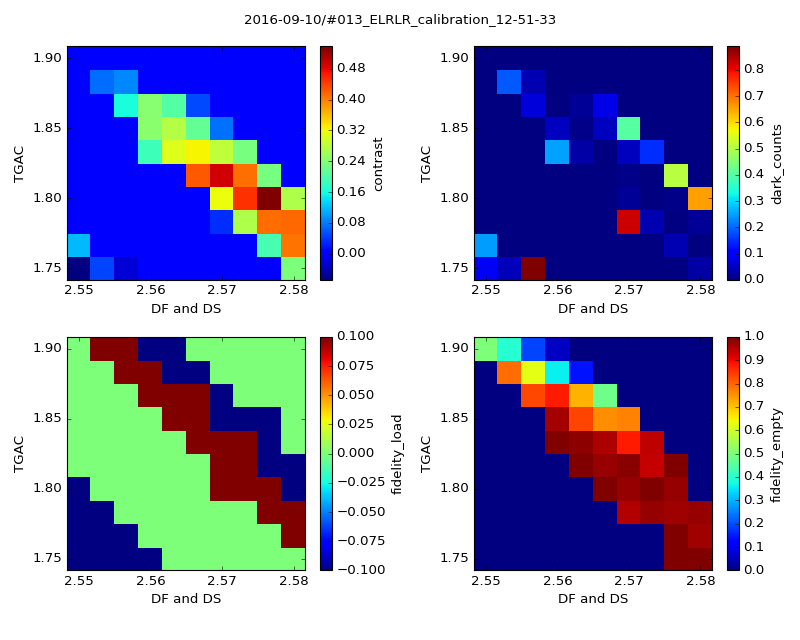

In [14]:
data = qc.load_data('2016-09-10/#013_ELRLR_calibration_12-51-33')

plot = qc.MatPlot(subplots=(2,2), figsize=(10,8))
plot.add(data.contrast, subplot=1, nticks=6)
plot.add(data.dark_counts, subplot=2, nticks=6)
plot.add(data.fidelity_load, subplot=3, nticks=6)
plot.add(data.fidelity_empty, subplot=4, nticks=6)
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

<IPython.core.display.Javascript object>


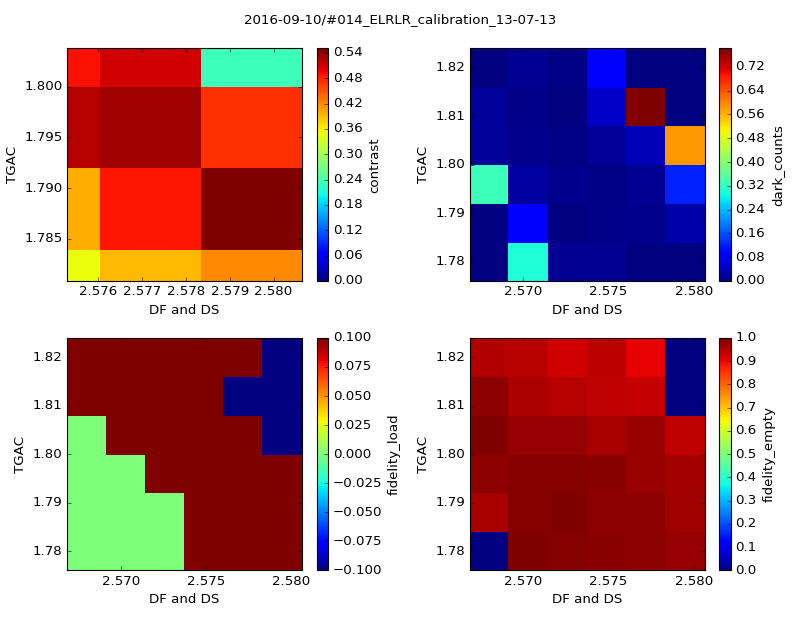

In [17]:
data = qc.load_data('2016-09-10/#014_ELRLR_calibration_13-07-13')

plot = qc.MatPlot(subplots=(2,2), figsize=(10,8))
plot.add(data.contrast, subplot=1, nticks=6)
plot.add(data.dark_counts, subplot=2, nticks=6)
plot.add(data.fidelity_load, subplot=3, nticks=6)
plot.add(data.fidelity_empty, subplot=4, nticks=6)
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

Final location:

TGAC(1.795)
DF_DS(2.577)

ELRLR results:

fidelity_empty: 0.993
fidelity_load: 1.000
fidelity_read: 0.863
up_proportion: 0.561
dark_counts: 0.005
contrast: 0.556

# Measurement set 1

## DC measurements

<IPython.core.display.Javascript object>


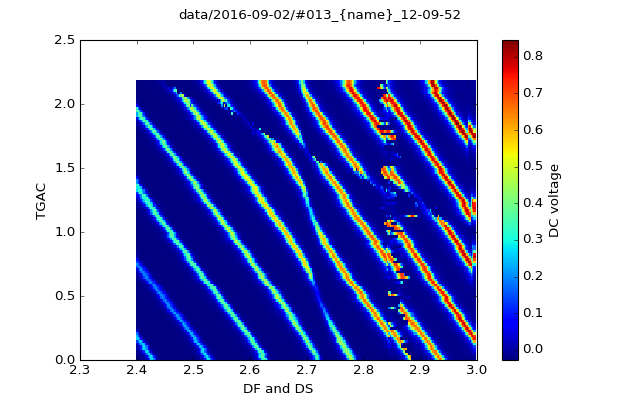

In [6]:
data = qc.load_data('data/2016-09-02/#013_{name}_12-09-52')
plotQ = qc.MatPlot()
plotQ.add(data.DC_voltage)

In [3]:
# Determining the coulomb peak trace
low = np.array([2.7607, 0.5018])
high = np.array([2.54653, 1.78387])
difference = high - low
ratio = difference / np.linalg.norm(difference)
print(ratio)

[-0.16476701  0.98633252]


The peaks seem to have shifted right after the measurements. Here is the updated version for a small region

<IPython.core.display.Javascript object>


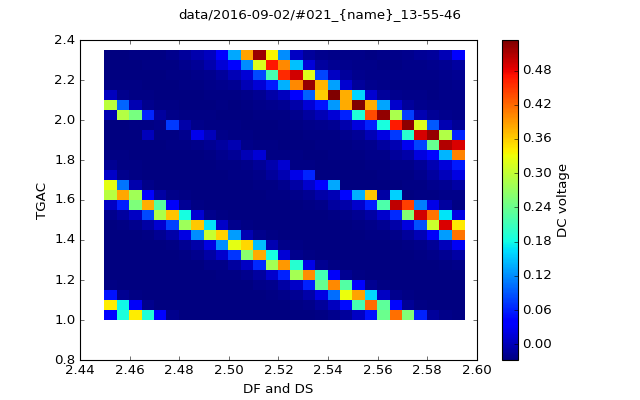

In [8]:
data = qc.load_data('data/2016-09-02/#021_{name}_13-55-46')
plotQ = qc.MatPlot()
plotQ.add(data.DC_voltage)

Below a zoom-in region is shown for the donor shift

<IPython.core.display.Javascript object>


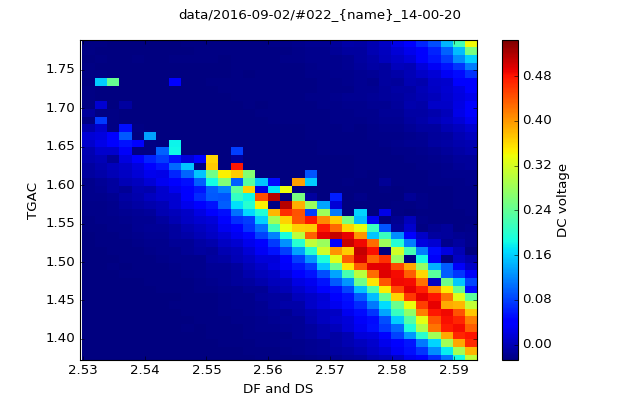

In [2]:
data = qc.load_data('data/2016-09-02/#022_{name}_14-00-20')
plotQ = qc.MatPlot()
plotQ.add(data.DC_voltage)

<IPython.core.display.Javascript object>


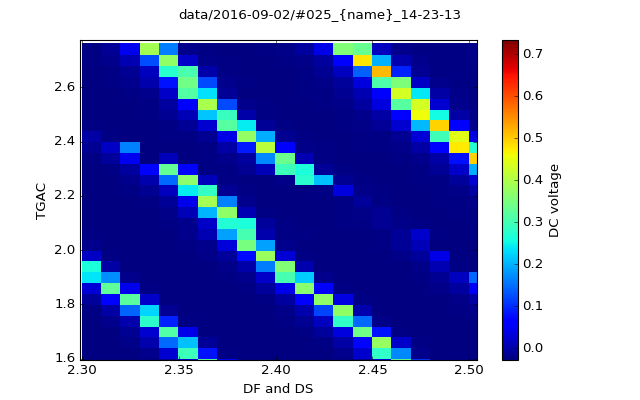

(0.8, 2.8)

In [13]:
data = qc.load_data('data/2016-09-02/#025_{name}_14-23-13')
plotQ = qc.MatPlot()
plotQ.add(data.DC_voltage)
plotQ.subplots[0].set_xlim(2.3,2.8)
plotQ.subplots[0].set_ylim(0.8,2.8)

## Tuning

<IPython.core.display.Javascript object>


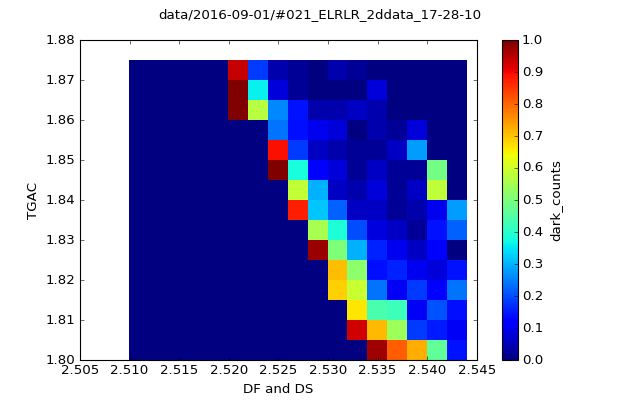

In [9]:
data = qc.load_data('data/2016-09-01/#021_ELRLR_2ddata_17-28-10')

plotQ = qc.MatPlot()
plotQ.add(data.dark_counts)

<IPython.core.display.Javascript object>


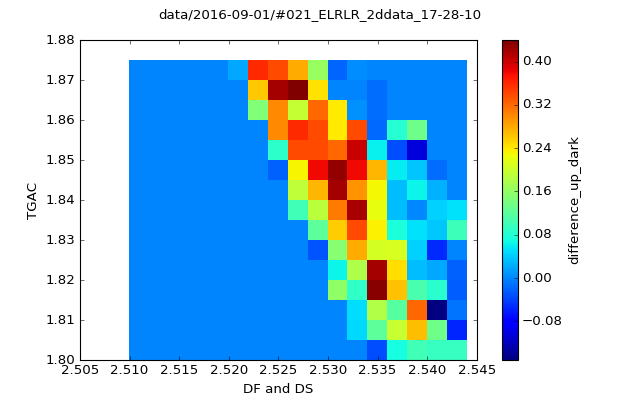

In [10]:
data = qc.load_data('data/2016-09-01/#021_ELRLR_2ddata_17-28-10')
plt.figure()
pl

# Variable read

<IPython.core.display.Javascript object>


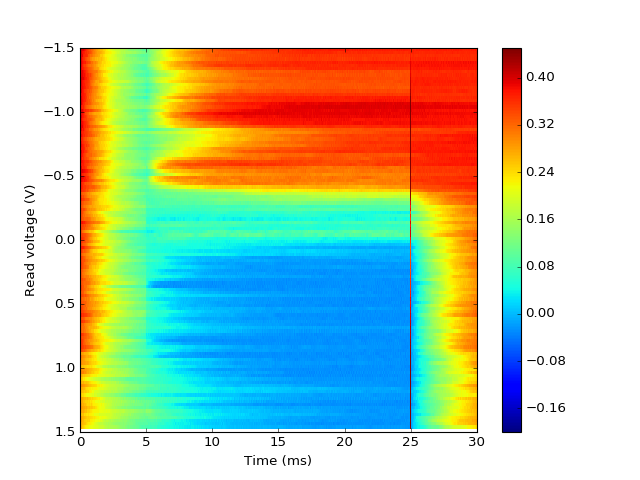

In [35]:
data = qc.load_data('data/2016-09-02/#030_variable_read_15-58-04')

fig = plt.figure()
plt.pcolormesh(data.index0[0]/1e3,
               data.variable_read_voltage_set,
               data.Channel_A_signal)
plt.ylim(plt.ylim()[::-1])
plt.colorbar()
plt.clim([-0.2,0.45])
plt.xlabel('Time (ms)')
plt.ylabel('Read voltage (V)')

<IPython.core.display.Javascript object>


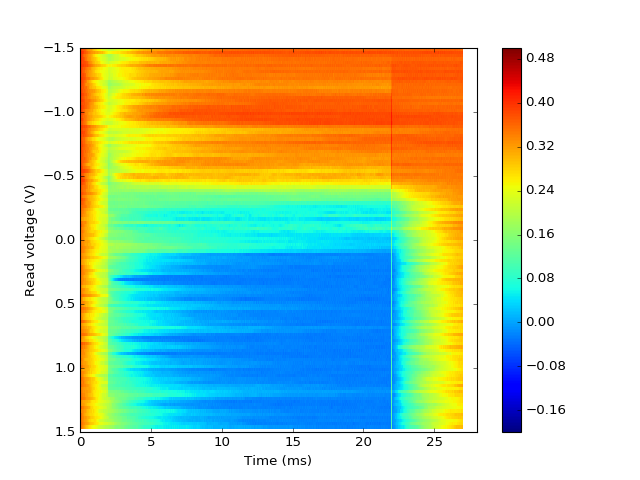

In [31]:
# data = qc.load_data('data/2016-09-02/#029_variable_read_15-29-43')

fig = plt.figure()
plt.pcolormesh(data.index0[0]/1e3,
               data.variable_read_voltage_set,
               data.Channel_A_signal,
               cmap=plt.get_cmap('jet'))
plt.xlim([0,28])
plt.ylim(plt.ylim()[::-1])
plt.colorbar()
plt.clim([-0.2,0.5])
plt.xlabel('Time (ms)')
plt.ylabel('Read voltage (V)')

# T1 measurement

Number of successful sweeps: 140


<IPython.core.display.Javascript object>


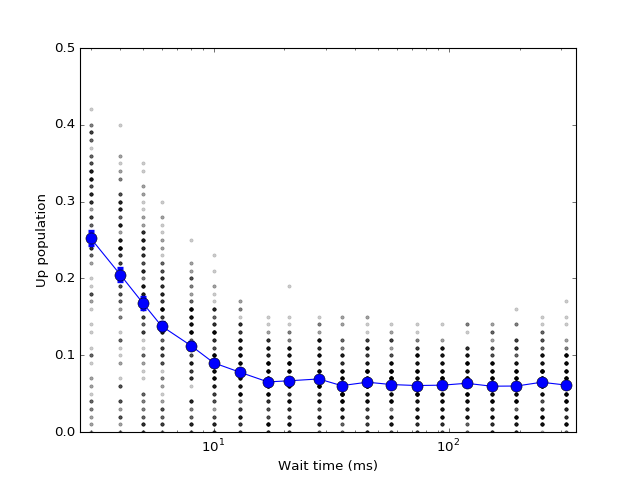

In [8]:
data = qc.load_data('data/2016-09-02/#001_T1_data_00-42-22')
T1_wait_times = data.T1_wait_time_set[0]
T1_wait_times_sorted = np.sort(T1_wait_times)
idx_sorted = np.argsort(T1_wait_times)

max_idx = np.argmin([~np.isnan(np.sum(datarow)) for datarow in data.up_proportion])
print('Number of successful sweeps: {}'.format(max_idx))
vals = data.up_proportion[:max_idx]
vals_sorted = vals[:,idx_sorted]
vals_mean_sorted = np.mean(vals_sorted,axis=0)
vals_std_sorted = np.std(vals_sorted,axis=0)


fig = plt.figure()
ax = fig.gca()
for datarow in vals_sorted:
    ax.plot(T1_wait_times_sorted, datarow, 'ok', ms=3, alpha=0.2)
(_, caps, _) = ax.errorbar(T1_wait_times_sorted, vals_mean_sorted, yerr=vals_std_sorted/np.sqrt(max_idx), marker='o', ms=10)
for cap in caps:
    cap.set_markeredgewidth(3)
ax.set_xscale("log")
ax.set_xlim([0.9*T1_wait_times_sorted[0], 1.1*T1_wait_times_sorted[-1]])
ax.set_ylim([0, 0.5])

ax.set_xlabel('Wait time (ms)')
ax.set_ylabel('Up population')